In [1]:
import torch
import numpy as np
import torch.nn.functional as F

## 2D Convolutional Operation

In [2]:
B = [[ 1,  3,  1,  3,  5,  4], [ 0,  3,  1,  3,  0,  0], [ 20,  3,  1,  3,  -1,  -1],
     [ 2,  0,  1,  -3,  5,  4], [ -2,  0,  0,  -7,  1,  2], [ 10,  0,  0,  0,  1,  8]]

In [3]:
# here is a 6x6 matrix
A = torch.FloatTensor(B)
# here is a 3x3 filter or kernel
f = torch.FloatTensor([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

In [4]:
f

tensor([[ 1.,  0., -1.],
        [ 1.,  0., -1.],
        [ 1.,  0., -1.]])

In [5]:
A

tensor([[ 1.,  3.,  1.,  3.,  5.,  4.],
        [ 0.,  3.,  1.,  3.,  0.,  0.],
        [20.,  3.,  1.,  3., -1., -1.],
        [ 2.,  0.,  1., -3.,  5.,  4.],
        [-2.,  0.,  0., -7.,  1.,  2.],
        [10.,  0.,  0.,  0.,  1.,  8.]])

Here is the convolution of `A` and `f` which is a 4x4 tensor.

In [6]:
F.conv2d(A.view(1,1,6,6),f.view(1,1,3,3))

tensor([[[[ 18.,   0.,  -1.,   6.],
          [ 19.,   3.,  -1.,   0.],
          [ 18.,  10.,  -3., -12.],
          [  9.,  10.,  -6., -24.]]]])

To compute the first element of the output tensor we compute the element wise multiplication of the top 3x3 sub-matrix of `A` (defined below) and `f` and then sum the results.

In [7]:
A1 = [ [1,  3,  1], [ 0,  3,  1], [20,  3,  1]]

**Question:** What is the size of the output tensor after a convolution of a $n \times n$ tensor with a $f x f$ filter?

You can check that is $(n - f + 1) \times (n - f + 1)$. That is why we get a 6 - 3+ 1 = 4, that is a $4 \times 4$ tensor.

## Edge detector
Here is an illustration on how the filter `f` can be seeing as an edge detector.

In [8]:
import matplotlib.pyplot as plt

In [9]:
b = [10, 10, 10, 0, 0, 0]
B = np.array([b, b, b, b, b, b])
A = torch.FloatTensor(B)
B

array([[10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0],
       [10, 10, 10,  0,  0,  0]])

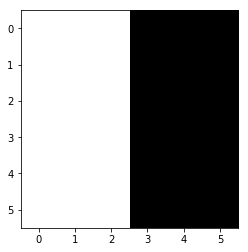

In [10]:
plt.imshow(B, cmap=plt.cm.gray)

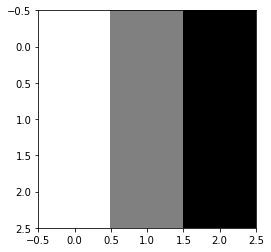

In [11]:
plt.imshow(f, cmap=plt.cm.gray)

In [13]:
C = F.conv2d(A.view(1,1,6,6),f.view(1,1,3,3))
C

tensor([[[[ 0., 30., 30.,  0.],
          [ 0., 30., 30.,  0.],
          [ 0., 30., 30.,  0.],
          [ 0., 30., 30.,  0.]]]])

In [14]:
D = C.data
D = D.numpy()
D = D.reshape((4,4))

Here is our edge.

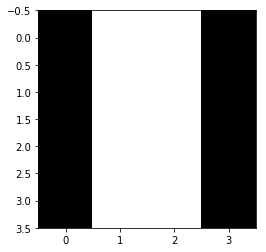

In [15]:
plt.imshow(D, cmap=plt.cm.gray)

## Padding 
Padding is an operation that adds a border with zeros around the image. Padding is important for these reasons:

* Padding allow the size of the output of a convolution to be the same as the size of the input. This is specially important when building deep neural networks.
* Without padding the interior pixes are used more than the edges pixes.

In [17]:
F.conv2d(A.view(1,1,6,6),f.view(1,1,3,3), padding=1)

tensor([[[[-20.,   0.,  20.,  20.,   0.,   0.],
          [-30.,   0.,  30.,  30.,   0.,   0.],
          [-30.,   0.,  30.,  30.,   0.,   0.],
          [-30.,   0.,  30.,  30.,   0.,   0.],
          [-30.,   0.,  30.,  30.,   0.,   0.],
          [-20.,   0.,  20.,  20.,   0.,   0.]]]])

**Question:** What is the size of the output tensor after a convolution of a $n \times n$ tensor with a $f x f$ filter if we use padding?

You can check that it is $(n - f + 1 + 2p) \times (n - f + 1 + 2p)$. That is why we get a $6 - 3 + 1 + 2 = 6$, that is a $6 \times 6$ tensor.

**Choice of convolutions type:**
    * "Valid": means no padding.
    * "Same": Pad so that the output size is the same and the input size. 
    
For "Same" convolution you want $n -f + 1 + 2p = n$ this implies $p = \frac{f-1}{2}$. That is one of the reasons you may want to use odd filter size. Filter size are typically 3, 5, 7, 9, 11.

## Stride
Stride controls how the filter convolves around the input. In the previous examples, the filter convolves around the input by shifting one unit at a time. The amount by which the filter shifts is the stride. 

In [19]:
F.conv2d(A.view(1,1,6,6), f.view(1,1,3,3), padding=0, stride=2)

tensor([[[[ 0., 30.],
          [ 0., 30.]]]])

The final output has dimensions $(\frac{n-f + 2p}{s} + 1) \times (\frac{n-f + 2p}{s} + 1)$. If the fraction is not an integer we take the floor of that number. 

## Color images

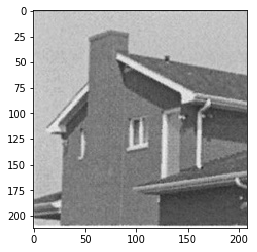

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
img = plt.imread("test_data/edge.jpg")
plt.imshow(img)

In [56]:
img.shape

(212, 208, 3)

In [57]:
# take one channel
A = img[:,:,0]
A.shape

(212, 208)

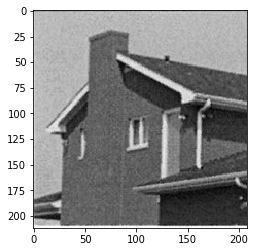

In [58]:
plt.imshow(A, cmap=plt.cm.gray)

In [59]:
A1 = torch.FloatTensor(A).view(1,1,212,208)
f1 = f.view(1,1,3,3)
C = F.conv2d(A1, f1)

In [60]:
C.size()

torch.Size([1, 1, 210, 206])

In [61]:
D = C.data
D = D.numpy()
D = D.reshape((210, 206))

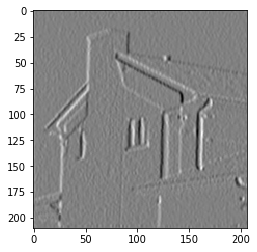

In [62]:
plt.imshow(D, cmap=plt.cm.gray)

## Max pooling 

In [63]:
B = [[ 1,  3,  1,  3,  5,  4], [ 0,  3,  1,  3,  0,  0], [ 20,  3,  1,  3,  -1,  -1],
     [ 2,  0,  1,  -3,  5,  4], [ -2,  0,  0,  -7,  1,  2], [ 10,  0,  0,  0,  1,  8]]
A = torch.FloatTensor(B)
A

tensor([[ 1.,  3.,  1.,  3.,  5.,  4.],
        [ 0.,  3.,  1.,  3.,  0.,  0.],
        [20.,  3.,  1.,  3., -1., -1.],
        [ 2.,  0.,  1., -3.,  5.,  4.],
        [-2.,  0.,  0., -7.,  1.,  2.],
        [10.,  0.,  0.,  0.,  1.,  8.]])

In [65]:
F.max_pool2d(A.view(1,1,6,6), kernel_size=2, stride=2)

tensor([[[[ 3.,  3.,  5.],
          [20.,  3.,  5.],
          [10.,  0.,  8.]]]])

In [66]:
F.max_pool2d(A.view(1,1,6,6), kernel_size=3, stride=1)

tensor([[[[20.,  3.,  5.,  5.],
          [20.,  3.,  5.,  5.],
          [20.,  3.,  5.,  5.],
          [10.,  1.,  5.,  8.]]]])